In [2]:
# First, run this cell to upgrade numpy and tensorflow
%pip install --upgrade numpy tensorflow

  Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\athar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [6]:
train = pd.read_csv(r"D:\PYTHON\Edunet2.0\day-10\DailyDelhiClimateTest\DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')
test = pd.read_csv(r"D:\PYTHON\Edunet2.0\day-10\DailyDelhiClimateTest\DailyDelhiClimateTest.csv")

In [8]:
train.head()



,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [9]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [10]:
train.tail()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [11]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [12]:
train.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [13]:
train['day'] = train.index.day
train['month'] = train.index.month

In [14]:
# Converting date to datetime format
test['date'] = pd.to_datetime(test['date'])
# Set date as index
test.set_index('date', inplace=True)
# Extract day and month features
test['day'] = test.index.day
test['month'] = test.index.month

In [15]:
#display train and test data
train.head()
test.head()

,meantemp,humidity,wind_speed,meanpressure,day,month
date,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,1,1
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,1
2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,1
2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,1
2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,1


In [16]:
# Concatenate the train and test data
data = pd.concat([train, test], axis=0)
# Since date is already the index, we don't need to drop it again
data.head()

,meantemp,humidity,wind_speed,meanpressure,day,month
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,1


In [17]:
import plotly.graph_objects as go

In [18]:
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(x = data.index, y = data['meantemp'], mode='lines', name='Mean Temperature'))

In [25]:
fig_temp.update_layout(
    title='Mean Temperature Over Time',
    xaxis_title='Date',
    yaxis_title='Mean Temperature (°C)',
    template='plotly_dark'
)

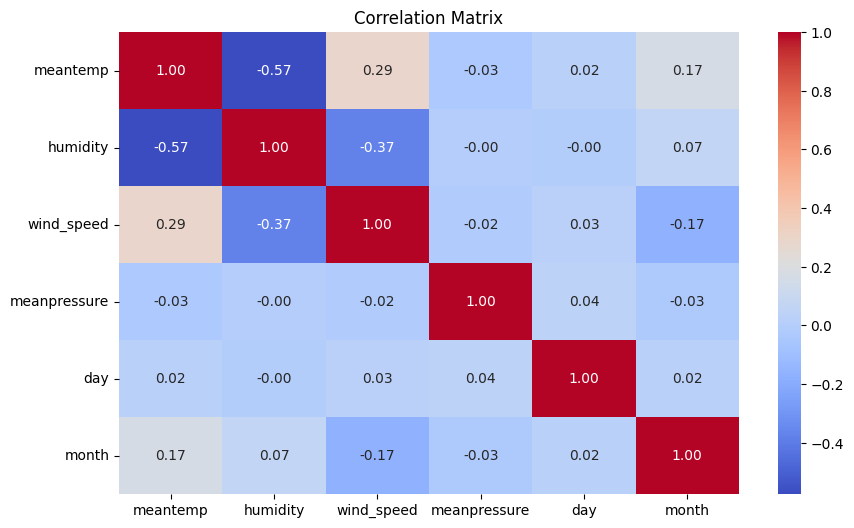

In [26]:
#make corelation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Drop 'day', 'month', 'year' columns if present, then calculate correlation
corr = data.drop(columns=['day', 'month', 'year'], errors='ignore').corr()

<Axes: >

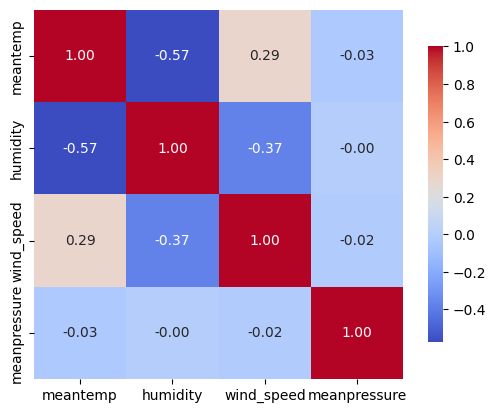

In [32]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
